In [1]:
import numpy as np
import time
import timeit
from matplotlib import pyplot as plt

In [2]:
# All elements are non negative!

CONST = 42
N_RUNS = 5

def const_function(vector: list):
    return CONST

def sum_elements(vector: list):
    s = 0
    for i in range(len(vector)):
        s += vector[i]
    return s

def product_of_elements(vector: list):
    product = 0
    for i in range(len(vector)):
        product *= vector[i]


def polinominal_sum(vector: list):
    P = 1.5
    polinom_sum = 0
    for i in range(0, len(vector)):
        polinom_sum += P * vector[i] ** i
    return polinom_sum

def horners_polinominal_sum(vector: np.array):
    P = 1.5
    polinominal_sum = 0
    if len(vector) <= 1:
        return sum(vector)
    for i in range(1, len(vector)):
        polinominal_sum = polinominal_sum*P + vector[i]
    return polinominal_sum

def bubble_sort(vector: list):
    vector = list(vector)
    for i in range(len(vector)):
        for j in range(len(vector) - 1):
            if vector[j] > vector[j + 1]:
                vector[j], vector[j + 1] = vector[j], vector[j + 1]
    return vector


def quick_sort(v: list):
    """Sort the array by using quicksort."""
    if len(v) == 0 or len(v) == 1:
        return v
    less = []
    equal = []
    greater = []
    if len(v) > 1:
        pivot = v[0]
        for x in v:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quick_sort(less) + equal + quick_sort(greater)
    else:
        return v


def estimate_algorythm_running_time(func, data):
    time_track = []
    for i in range(data.shape[0]):
        start_time = time.time()
        _ = func(data[i])
        end_time = time.time()
        time_track.append(end_time - start_time)
    return np.mean(time_track)

def linear_function(vector_size):
    return np.array(range(1, vector_size + 1))

def exponential_function(vector_size, pow=2):
    return np.power(np.array(range(1, vector_size + 1)), pow)

def log_function(vector_size):
    return np.log(np.array(range(1, vector_size+1)))

def nlog_function(vector_size):
    vector = np.array(range(1, vector_size+1))
    return vector * np.log(vector)
    


def plot_track(time_ellapsed, algorithm_complexity, algorythm_name, estimated_fuction_name):
    fig, ax = plt.subplots()

    # ax.plot(batch_size, time_series, color='red')

    plt.grid()
    x_values = list(range(1, 2001))
    print(algorithm_complexity)
    lns1 = ax.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
    ax2 = ax.twinx()
    lns3 = ax2.plot(x_values, algorithm_complexity, '-r', label = f'Expected time ({estimated_fuction_name})')


    ax.tick_params(axis='y')

    # added these three lines
    lns = lns1+lns3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0)

    ax2.get_yaxis().set_ticks([])
    ax2.get_yaxis().set_ticks([])
    ax.set_title(algorythm_name)
    ax.set_xlabel('Vector size')
    ax.set_ylabel('Time ellapsed')
    
    fig.savefig(f'figures/{algorythm_name}.png')

## I task

In [3]:
algorithms_track = {}

In [ ]:
# estimation_mapper = {
#     'Timsort algorythm': (nlog_function(2000), 'O(N * Log(N))'),
#     'constant': ([0] * 2000, "O(1)"),
#     'Sum of elements': (linear_function(2000), "O(N)"),
#     'Product of elements': (linear_function(2000), "O(N)"),
#     'Polinominal sum': (nlog_function(2000), "O(N * Log(N))"),
#     'Bubble sort algorythm': (exponential_function(2000), "O(N ^ 2)"),
#     'Quick sort algorythm': (nlog_function(2000), "O(N * Log(N))"),
#     'Timsort algorythm': (nlog_function(2000), "O(N * Log(N))"),
#     "Horner's sum": (linear_function(2000), "O(N * Log(N))")
# }

In [36]:
sorting_algorythms = [
    ('constant', const_function),
    ('Sum of elements', sum_elements),
    ('Product of elements', product_of_elements),
    ('Polinominal sum', polinominal_sum),
    ("Horner's polinom sum", horners_polinominal_sum),
    #('Bubble sort algorithm', bubble_sort),
    ('Quick sort algorithm', quick_sort),
    ('Timsort algorithm', sorted),
    ]


estimation_mapper = {
    'Timsort algorythm': (nlog_function, 'O(N * Log(N))'),
    'constant': (lambda x: [0]*2000, "O(1)"),
    'Sum of elements': (linear_function, "O(N)"),
    'Product of elements': (linear_function, "O(N)"),
    'Polinominal sum': (nlog_function, "O(N * Log(N))"),
    #'Bubble sort algorythm': (exponential_function, "O(N ^ 2)"),
    'Quick sort algorythm': (nlog_function, "O(N * Log(N))"),
    'Timsort algorythm': (nlog_function, "O(N * Log(N))"),
    "Horner's sum": (linear_function, "O(N * Log(N))")
}
    

In [38]:
for (name, algorythm) in sorting_algorythms:
    time_track = []
    print(name)
    start = time.time()
    for vector_len in range(1, 2001):
        data = np.random.rand(N_RUNS, vector_len)
        running_time =  estimate_algorythm_running_time(algorythm, data)
        time_track.append(running_time)
    end = time.time()
    print(end - start)
    algorithms_track[name] = time_track

constant
0.12797951698303223
Sum of elements
2.8199827671051025
Product of elements
2.826364517211914
Polinominal sum
9.09803819656372
Horner's polinom sum


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


4.4781575202941895
Quick sort algorithm
27.8428316116333
Timsort algorithm
3.5532705783843994


In [117]:
for (name, algorythm) in [('Polinominal sum', polinominal_sum), "Horner's sum", horners_polinominal_sum)]:
    time_track = []
    print(name)
    start = time.time()
    for vector_len in range(1, 2001):
        data = np.random.rand(N_RUNS, vector_len)
        running_time = estimate_algorythm_running_time(algorythm, data)
        time_track.append(running_time)
    end = time.time()
    print((end - start) / 60)
    algorythms_track[name] = time_track

Polinominal sum
0.1605033238728841
Horner's sum


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in double_scalars


0.07896277904510499


In [8]:
import pandas as pd
import re

In [153]:
# df = pd.DataFrame(data=algorythms_track)
# df.to_csv('drive/MyDrive/M&M/algorithms.csv', index=False)

In [412]:
df.columns = [re.sub('algorythm', 'algorithm', x) for x in df.columns]

In [9]:
df = pd.read_csv('drive/MyDrive/M&M/algorithms.csv')

In [13]:
for col in df.columns:
  algorithms_track[col] = df[col].values

In [404]:
estimation_mapper = {
    'Timsort algorithm': (nlog_function, 'O(N * Log(N))'),
    'constant': (lambda x: [0]*2000, "O(1)"),
    'Sum of elements': (linear_function, "O(N)"),
    'Product of elements': (linear_function, "O(N)"),
    'Polinominal sum': (nlog_function, "O(N * Log(N))"),
    'Bubble sort algorithm': (exponential_function, "O(N ^ 2)"),
    'Quick sort algorithm': (nlog_function, "O(N * Log(N))"),
    'Timsort algorithm': (nlog_function, "O(N * Log(N))"),
    "Horner's sum": (linear_function, "O(N * Log(N))")
}

In [ ]:
estimation_mapper['constant'][0](2000)

In [352]:
new_mapper = {}
for algorythm in estimation_mapper.keys():
  estimation, name = estimation_mapper[algorythm]
  time_ellapsed = algorythms_track[algorythm]
  xvals = np.array(range(1, 2001))
  a = time_ellapsed[-500] / xvals[-500]**2
  new_mapper[algorythm] = (np.array(estimation(2000)) * a, name)

[0. 0. 0. ... 0. 0. 0.]


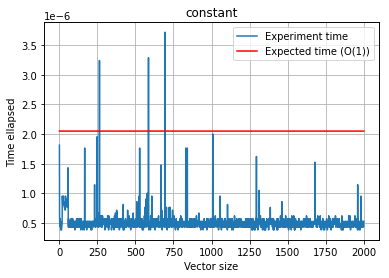

In [357]:
for algorythm in ['constant']:
  estimated, theoretical_complexity = new_mapper[algorythm]
  time_ellapsed = algorythms_track[algorythm]
  plot_track(time_ellapsed, estimated, algorythm, theoretical_complexity)

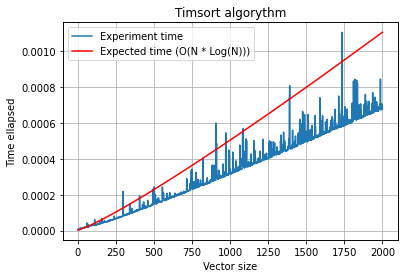

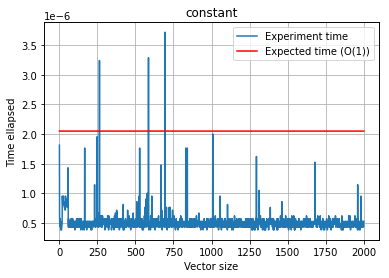

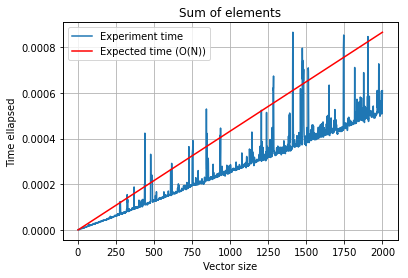

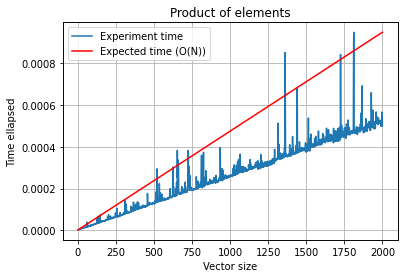

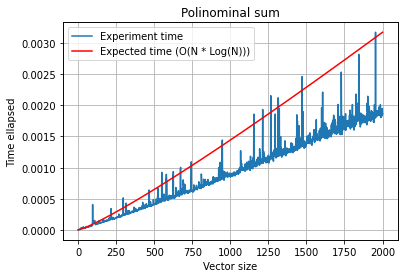

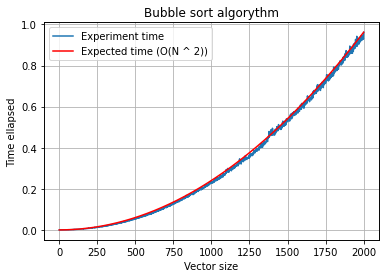

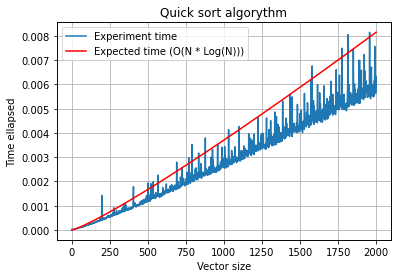

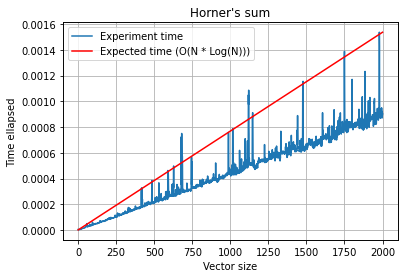

In [355]:
for algorythm in new_mapper:
  estimated, theoretical_complexity = new_mapper[algorythm]
  time_ellapsed = algorythms_track[algorythm]
  plot_track(time_ellapsed, estimated, algorythm, theoretical_complexity)

In [ ]:
np.polyfit()

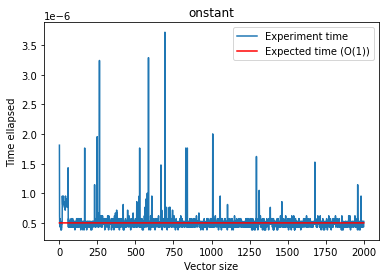

In [370]:
# lns1 = ax.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
# ax2 = ax.twinx()
# lns3 = ax2.plot(x_values, algorithm_complexity, '-r', label = f'Expected time ({estimated_fuction_name})')
plt.title("Constant function")
plt.xlabel('Vector size')
plt.ylabel('Time ellapsed')
plt.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
plt.plot(x_values, [5.e-7]*2000, '-r', label = f'Expected time (O(1))')
plt.legend()

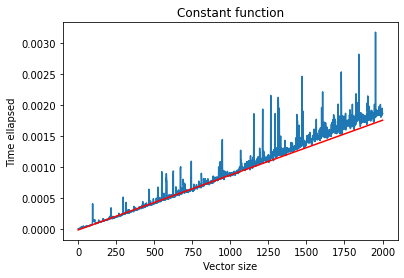

In [372]:
n, m, b = np.polyfit(x_values, algorythms_track['Polinominal sum'], 2)

plt.plot(x_values, algorythms_track['Polinominal sum'], '-', label = 'Experiment time')
plt.title("Polinomial Sum")
plt.xlabel('Vector size')
plt.ylabel('Time ellapsed')
plt.plot(x_values, m*np.array(x_values)** n + m*np.array(x_values) + b, '-r', label = f'Expected time (O(N*log(N)))')

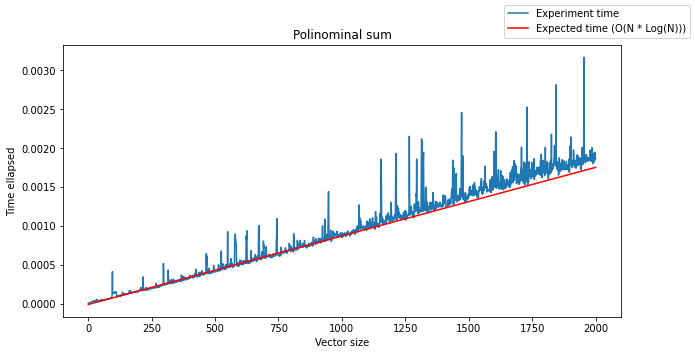

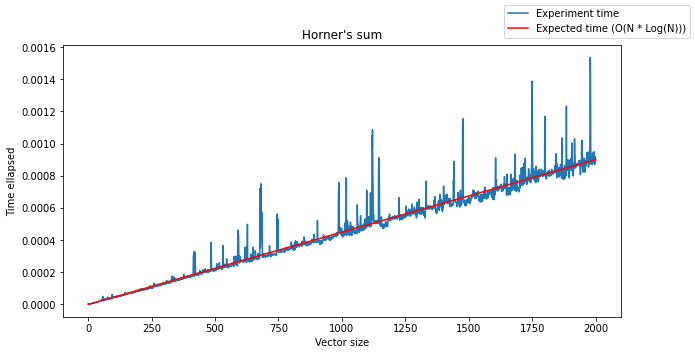

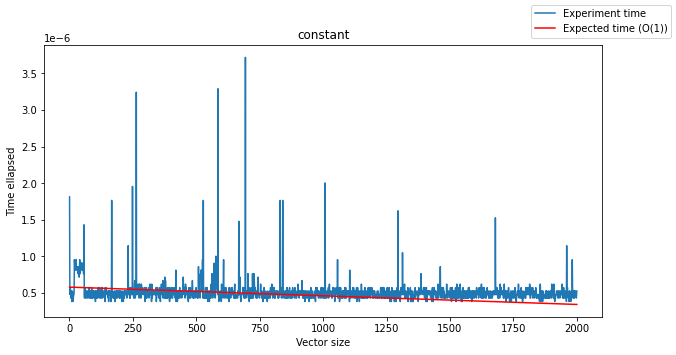

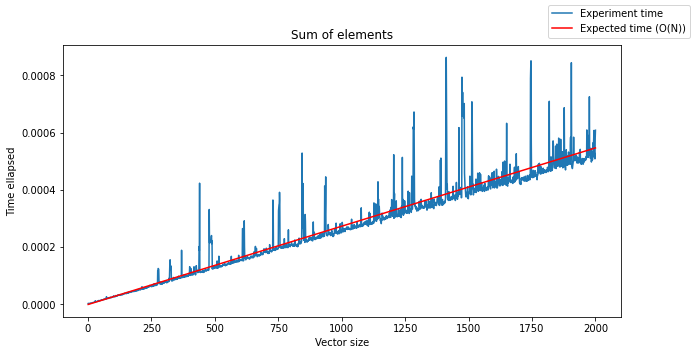

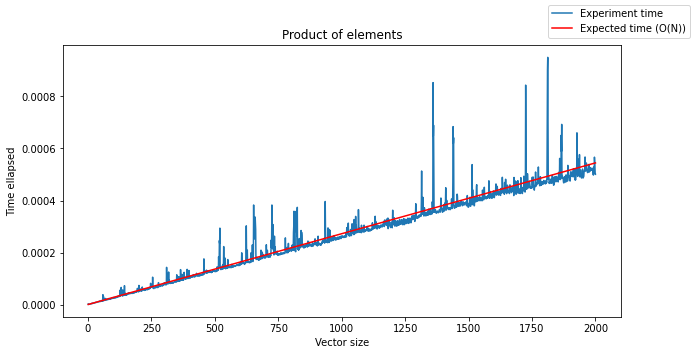

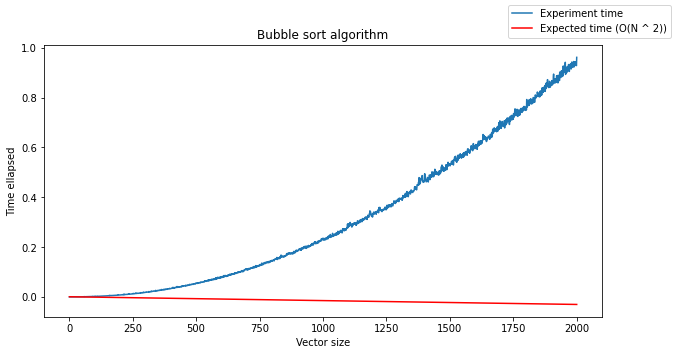

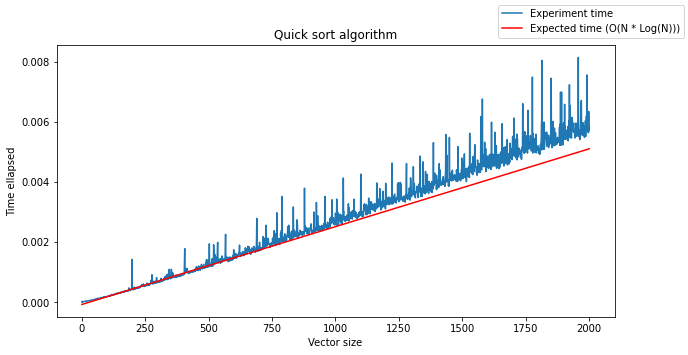

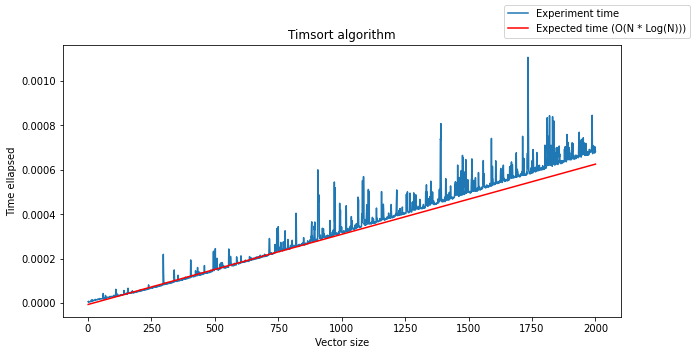

In [430]:
for i, algorithm in enumerate(algorithms_track):
  fig, ax = plt.subplots(figsize=(10, 5))
  estimated, theoretical_complexity = estimation_mapper[algorithm]
  time_ellapsed = algorythms_track[algorithm]

  n, m, b = np.polyfit(x_values, algorythms_track[algorithm], 2)
  
  ax.plot(x_values, algorythms_track[algorithm], '-', label = 'Experiment time')
  ax.set_title(algorithm)
  ax.set_xlabel('Vector size')
  ax.set_ylabel('Time ellapsed')
  ax.plot(x_values, m*np.array(x_values)** n + m*np.array(x_values) + b, '-r', label = f'Expected time ({theoretical_complexity})')
  fig.legend()
  fig.savefig(f'figures/{algorithm}.png')

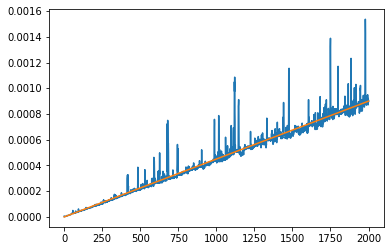

In [325]:
n, m, b = np.polyfit(x_values, algorythms_track[algorythm], 2)

plt.plot(x_values, algorythms_track[algorythm])
plt.plot(x_values, m*np.array(x_values)** n + m*np.array(x_values) + b)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## II task

In [10]:
df_matrix = pd.read_csv('drive/MyDrive/M&M/matrix_mult.csv')

In [19]:
time_ellapsed = df_matrix['matrix_mul']

In [22]:
n, m, b

(0.0001499040745436696, -0.028275517034161115, 1.0738414819714661)

In [30]:
n, m, b

(0.0001499040745436696, -0.028275517034161115, 1.0738414819714661)

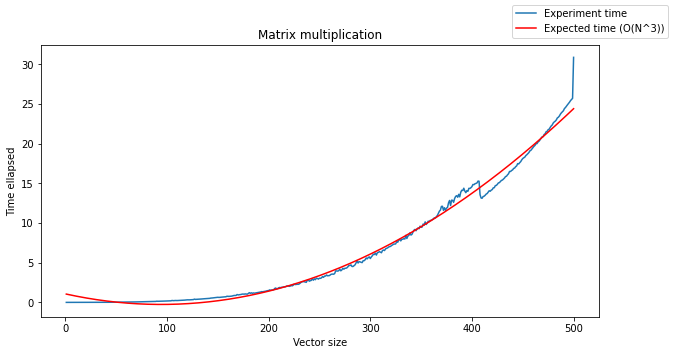

In [31]:
algorithm = 'Matrix multiplication'
fig, ax = plt.subplots(figsize=(10, 5))
theoretical_complexity = 'O(N^3)'
x_values = np.array(range(1, 501))
n, m, b = np.polyfit(x_values, time_ellapsed, 2)

ax.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
ax.set_title(algorithm)
ax.set_xlabel('Vector size')
ax.set_ylabel('Time ellapsed')
ax.plot(x_values, np.array(x_values)** 2* n + m * np.array(x_values) + b, '-r', label = f'Expected time ({theoretical_complexity})')
fig.legend()